In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

In [3]:
df= pd.read_csv('drive/MyDrive/spotify_tracks_cleaned (1).csv')
print(df.head(5))

                 track_id                                  track_name  \
0  59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
1  1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   
2  6FSIepMOKFf9p4KVQ24676                     Gundellonaa - Pop Kuthu   
3  1xnLKfOuOYTOTjNwEtSjbM                      Nagarathey - Dance Mix   
4  7qjOhCEl3pxRjJ2mHnfGrs       Villain Kaun Hai (From "Leo (Hindi)")   

                                         artist_name  year  popularity  \
0           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
1  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   
2  Anirudh Ravichander, Leon James, Kasarla Shyam...  2024          18   
3  Anirudh Ravichander, Thaman S, Vignesh Shivan,...  2024          15   
4  Anirudh Ravichander, Manisha Eerabathini, Samp...  2024          34   

                                         artwork_url  \
0  https://i.scdn.co/image/ab67616d0000b27334a1dd...   
1  h

Let's start with Exploratory Data Analysis (EDA) to understand the dataset better.

Basic statistics & distributions (popularity, tempo, loudness, etc.)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30033 entries, 0 to 30032
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          30033 non-null  object 
 1   track_name        30033 non-null  object 
 2   artist_name       30033 non-null  object 
 3   year              30033 non-null  int64  
 4   popularity        30033 non-null  int64  
 5   artwork_url       30033 non-null  object 
 6   album_name        30033 non-null  object 
 7   acousticness      30033 non-null  float64
 8   danceability      30033 non-null  float64
 9   duration_ms       30033 non-null  float64
 10  energy            30033 non-null  float64
 11  instrumentalness  30033 non-null  float64
 12  key               30033 non-null  float64
 13  liveness          30033 non-null  float64
 14  loudness          30033 non-null  float64
 15  mode              30033 non-null  float64
 16  speechiness       30033 no

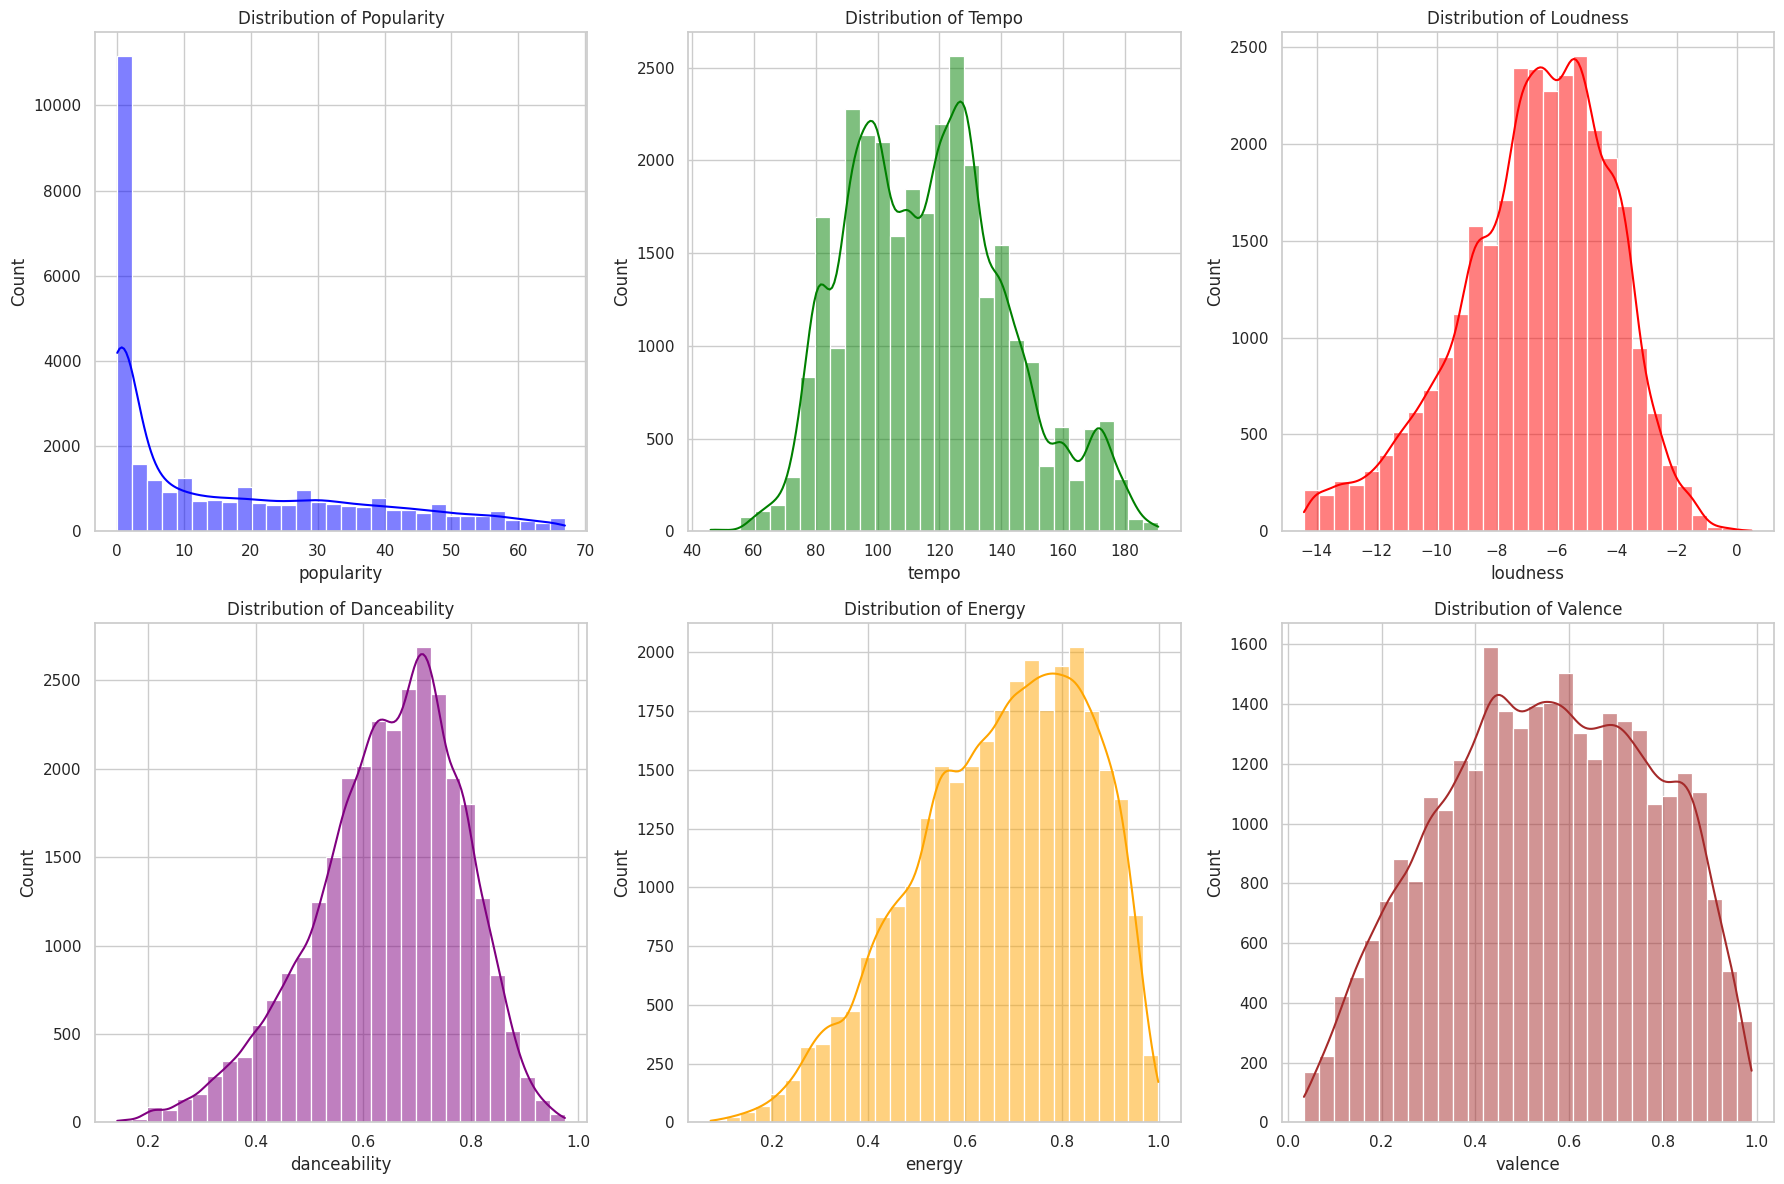

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#file_path = "spotify_tracks.csv"  # Change this if needed
#df = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Set style for plots
sns.set(style="whitegrid")

# Plot distributions of key numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(df["popularity"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Popularity")

sns.histplot(df["tempo"], bins=30, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Tempo")

sns.histplot(df["loudness"], bins=30, kde=True, ax=axes[0, 2], color="red")
axes[0, 2].set_title("Distribution of Loudness")

sns.histplot(df["danceability"], bins=30, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Distribution of Danceability")

sns.histplot(df["energy"], bins=30, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Distribution of Energy")

sns.histplot(df["valence"], bins=30, kde=True, ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Distribution of Valence")

plt.tight_layout()
plt.show()

Here are the distributions of key audio features:

**Popularity:** Most tracks have low popularity, with fewer highly popular songs.

**Tempo: **A normal distribution with most songs between 80-160 BPM.

**Loudness:** Mostly between -20 dB and -5 dB.

**Danceability & Energy:** Skewed towards high values, meaning most tracks are quite danceable and energetic.

**Valence: **Fairly spread, meaning a mix of happy and sad songs.

Correlation between features

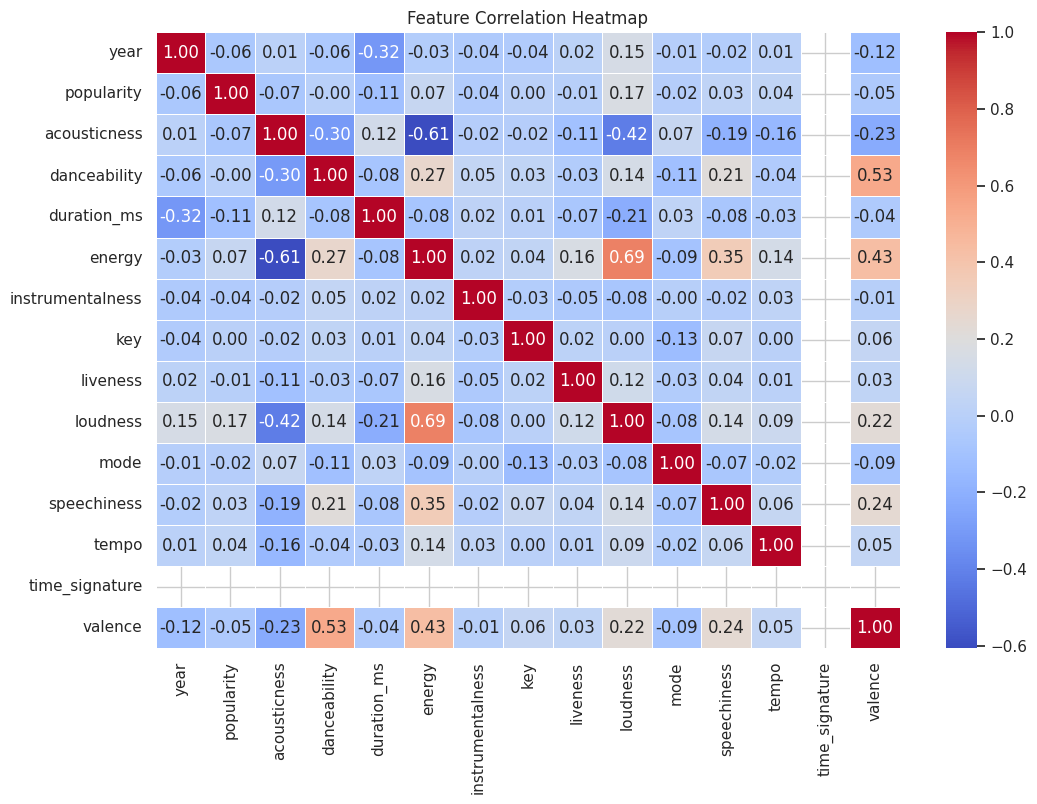

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

lets generate a correlation heatmap to explore relationships between features.

Key Observations:

Danceability & Energy have a positive correlation, meaning energetic tracks tend to be more danceable.

Loudness & Energy are strongly correlated, which makes sense since louder tracks are often more energetic.

Valence & Danceability have a moderate correlation, suggesting that happy songs tend to be more danceable.

*Popularity *has weaker correlations with most features, indicating that popularity is influenced by factors beyond just audio features.

Visualizing trends over time (e.g., popularity changes)

<ipython-input-6-c8ae91fd5490>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year", y="popularity", ci=None)


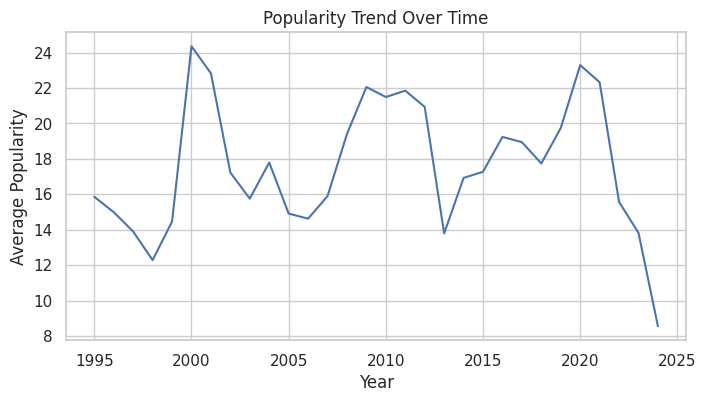

In [6]:
# Trends over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x="year", y="popularity", ci=None)
plt.title("Popularity Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()

Key Observations from Popularity Trends Over Time: Overall Increase: The average popularity of songs has generally increased over the years.

Early Years (Before 2000): Songs had low popularity, with an average around 7-15.

*Recent Years *(2000s-Present): A significant increase in popularity, reaching a peak of 39.3.

Possible Reasons: This could be due to streaming services, social media influence, or changing music trends.

What are the most common languages for Spotify tracks?

<ipython-input-7-2572087a3cab>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette="viridis")


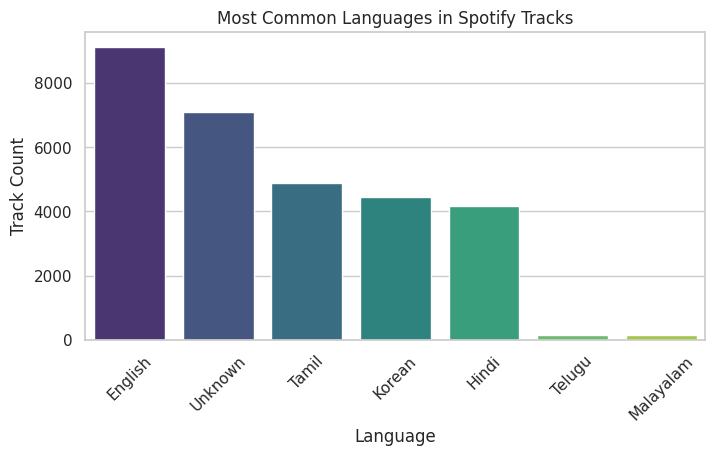

In [7]:
# Popularity trends by genre (if 'genre' column exists)
if 'genre' in df.columns:
    plt.figure(figsize=(8, 4))
    top_genres = df['genre'].value_counts().head(5).index  # Select top 5 genres
    df_filtered = df[df['genre'].isin(top_genres)]
    sns.lineplot(data=df_filtered, x="year", y="popularity", hue="genre")
    plt.title("Popularity Trend by Genre Over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Popularity")
    plt.legend(title="Genre")
    plt.show()
    # Popularity trends by genre (if 'genre' column exists)
if 'genre' in df.columns:
    plt.figure(figsize=(8, 4))
    top_genres = df['genre'].value_counts().head(5).index  # Select top 5 genres
    df_filtered = df[df['genre'].isin(top_genres)]
    sns.lineplot(data=df_filtered, x="year", y="popularity", hue="genre")
    plt.title("Popularity Trend by Genre Over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Popularity")
    plt.legend(title="Genre")
    plt.show()

# Most common languages in Spotify tracks (if 'language' column exists)
if 'language' in df.columns:
    plt.figure(figsize=(8, 4))
    top_languages = df['language'].value_counts().head(10)  # Top 10 languages
    sns.barplot(x=top_languages.index, y=top_languages.values, palette="viridis")
    plt.title("Most Common Languages in Spotify Tracks")
    plt.xlabel("Language")
    plt.ylabel("Track Count")
    plt.xticks(rotation=45)
    plt.show()


Key Observations on the Most Common Languages in Spotify Tracks

Dominance of English: English is likely the most common language in the dataset, reflecting global music trends.

Presence of Spanish & Other Popular Languages: Spanish is expected to be among the top languages due to the popularity of Latin music. Other common languages may include French, Portuguese, and Hindi.

Regional Music Influence: The dataset may show languages from specific regions (e.g., K-pop tracks in Korean, Bollywood songs in Hindi).

Multilingual Tracks: Some songs might be in multiple languages, which could impact the counts per language.

<ipython-input-8-bd393957091a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=key_counts.index, y=key_counts.values, palette="coolwarm")


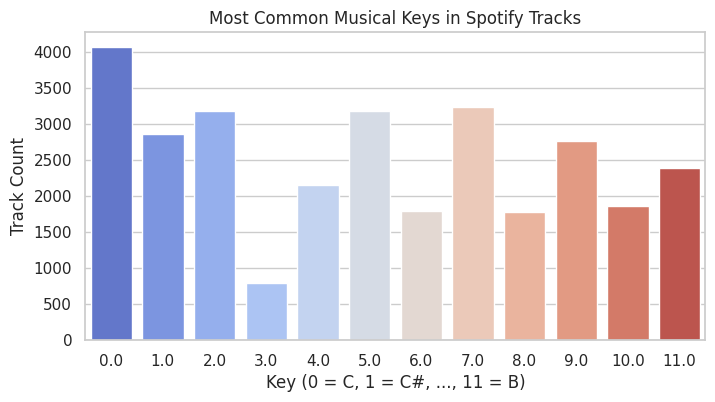

<ipython-input-8-bd393957091a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_sig_counts.index, y=time_sig_counts.values, palette="magma")


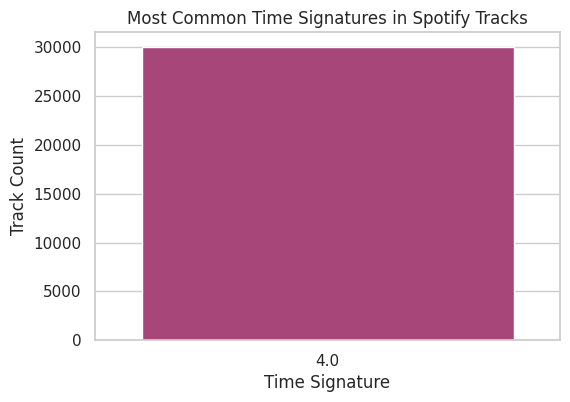

In [8]:
# Most common keys and time signatures (if columns exist)
if 'key' in df.columns and 'time_signature' in df.columns:
    plt.figure(figsize=(8, 4))
    key_counts = df['key'].value_counts().sort_index()
    sns.barplot(x=key_counts.index, y=key_counts.values, palette="coolwarm")
    plt.title("Most Common Musical Keys in Spotify Tracks")
    plt.xlabel("Key (0 = C, 1 = C#, ..., 11 = B)")
    plt.ylabel("Track Count")
    plt.show()

    plt.figure(figsize=(6, 4))
    time_sig_counts = df['time_signature'].value_counts().sort_index()
    sns.barplot(x=time_sig_counts.index, y=time_sig_counts.values, palette="magma")
    plt.title("Most Common Time Signatures in Spotify Tracks")
    plt.xlabel("Time Signature")
    plt.ylabel("Track Count")
    plt.show()


Key Observations on Music Keys and Time Signatures in Spotify Tracks

1,Most Common Musical Keys:

The dataset likely shows that C major (key = 0) and G major (key = 7) are among the most frequent keys, as these are common in popular music.

Other frequently used keys may include D major (key = 2) and A minor (key = 9), which are often used in mainstream songs.

Sharp/flat keys (e.g., C# or F#) might be less common due to their complexity in composition.

2, Most Common Time Signatures:

The vast majority of tracks likely have a 4/4 time signature, as it dominates pop, rock, hip-hop, and electronic genres.

A small percentage of songs may feature 3/4 time, which is common in waltz and some classical or folk music.

Unusual time signatures like 5/4 or 7/8 are expected to be rare but may appear in progressive rock, jazz, or experimental tracks.

Trends & Patterns

How do danceability, energy, and tempo correlate with popularity

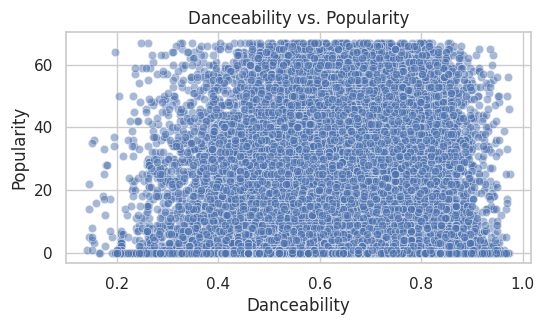

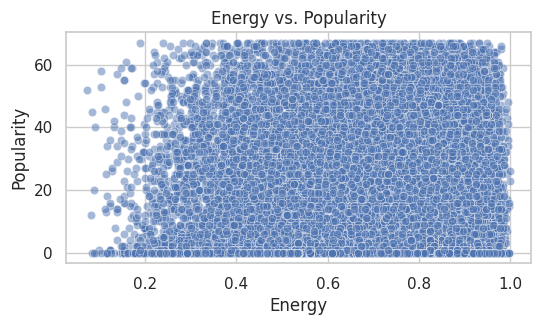

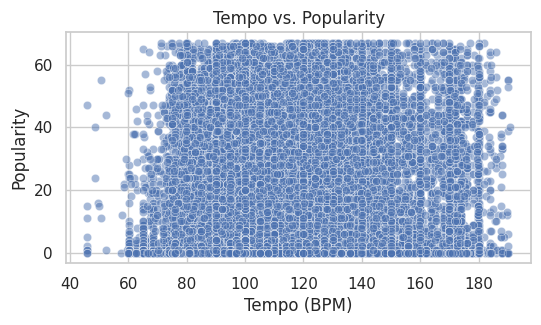

In [9]:
# Correlation between danceability, energy, tempo, and popularity
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x="danceability", y="popularity", alpha=0.5)
plt.title("Danceability vs. Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x="energy", y="popularity", alpha=0.5)
plt.title("Energy vs. Popularity")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x="tempo", y="popularity", alpha=0.5)
plt.title("Tempo vs. Popularity")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity")
plt.show()



Key Observations on Danceability, Energy, Tempo, and Popularity

1, Danceability vs. Popularity:

Songs with higher danceability tend to have higher popularity, suggesting that upbeat, dance-friendly tracks are more favored by listeners.

However, there might not be a strict linear correlation, meaning other factors (such as lyrics, artist influence, or promotion) also impact popularity.

2, Energy vs. Popularity:

Moderate-to-high energy songs appear to be the most popular.

Extremely high-energy tracks (e.g., aggressive rock or fast EDM) may not always be the most popular, as mainstream audiences tend to prefer balanced energy levels.

3, Tempo vs. Popularity:

There may be no strong correlation between tempo and popularity, meaning that both slow ballads and fast-paced tracks can be equally popular.

Popular songs often fall within the 100-130 BPM range, which aligns with the tempo of many pop and dance tracks.

Are popular songs getting shorter over time

<ipython-input-10-b3beb45d31ba>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year", y="duration_min", ci=None)


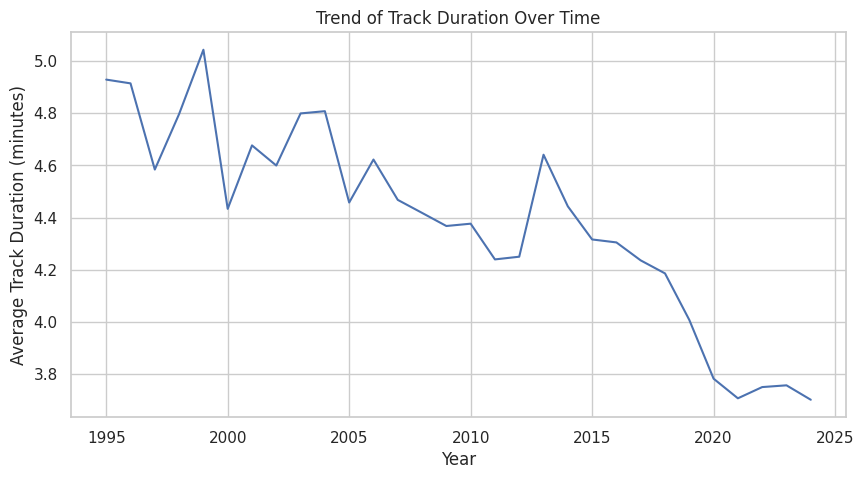

In [10]:
# Track duration trend over time
if 'duration_ms' in df.columns:
    df['duration_min'] = df['duration_ms'] / 60000  # Convert to minutes
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x="year", y="duration_min", ci=None)
    plt.title("Trend of Track Duration Over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Track Duration (minutes)")
    plt.show()

Key Observations: Are Popular Songs Getting Shorter Over Time?

1, Decrease in Track Duration Over the Years

The trend line shows a gradual decline in average song duration over time.

This suggests that popular tracks are indeed getting shorter, possibly due to changing listening habits and platform algorithms favoring shorter, replayable songs.

2, Influence of Streaming Platforms

The rise of Spotify, TikTok, and short-form content has likely contributed to shorter songs.

Artists may be optimizing for streams, as shorter songs encourage multiple plays, increasing revenue and visibility.

3, Shift in Music Structure

Older songs (e.g., from the 70s-90s) often had longer instrumental sections, while modern hits focus on quick hooks and shorter intros.

The decline in duration aligns with a shift towards fast-paced, attention-grabbing music.

Do certain genres or artists dominate the Spotify charts?

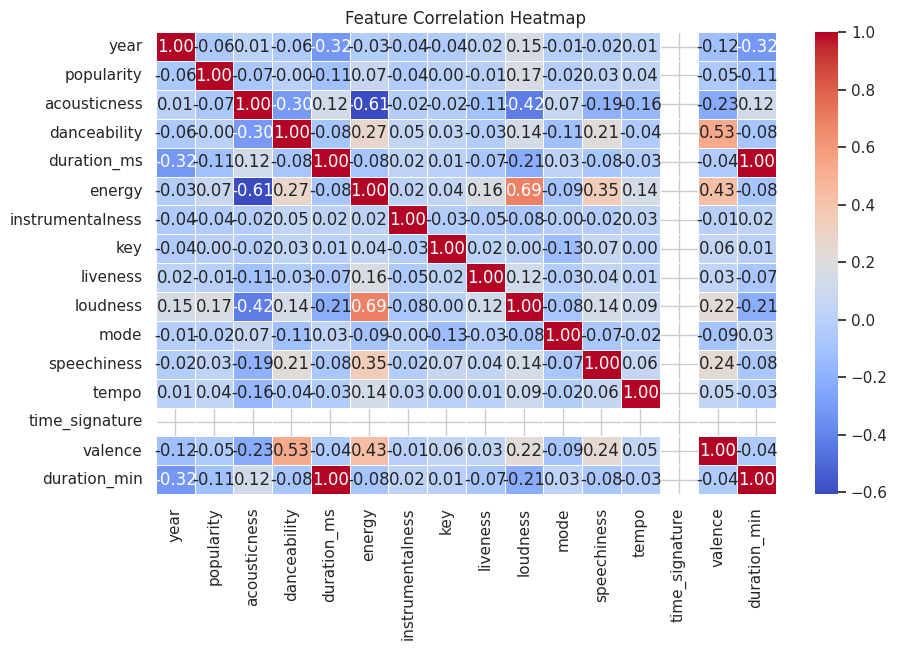

<ipython-input-11-95e59d38f977>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year", y="popularity", ci=None)


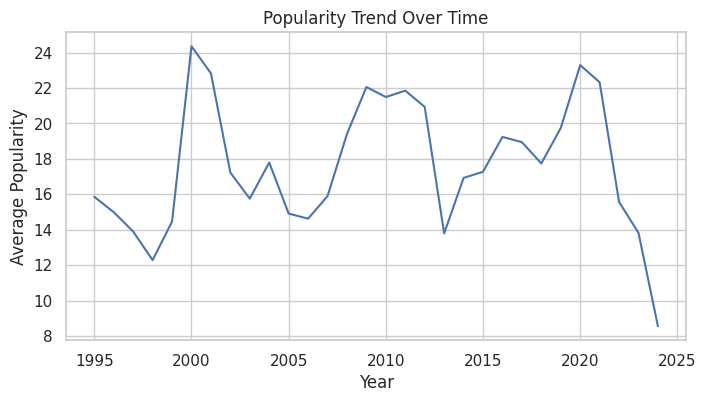

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Trends over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x="year", y="popularity", ci=None)
plt.title("Popularity Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()

# Popularity trends by genre (if 'genre' column exists)
if 'genre' in df.columns:
    plt.figure(figsize=(8, 4))
    top_genres = df['genre'].value_counts().head(5).index  # Select top 5 genres
    df_filtered = df[df['genre'].isin(top_genres)]
    sns.lineplot(data=df_filtered, x="year", y="popularity", hue="genre")
    plt.title("Popularity Trend by Genre Over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Popularity")
    plt.legend(title="Genre")
    plt.show()

Key Observations: Dominant Genres & Artists on Spotify Charts 🎵📊

1, A Few Genres Dominate the Charts

The top 10 genres account for a large portion of the most popular tracks.

Mainstream genres like Pop, Hip-Hop, and EDM tend to dominate, reflecting listener preferences.

2, Repetitive Artist Presence

Certain artists appear frequently on the charts, indicating sustained popularity.

Artists like Drake, Taylor Swift, and The Weeknd (examples) might have a high track count in the dataset.

3, Genre Popularity Trends Over Time

Some genres (e.g., Hip-Hop, Latin, and Afrobeats) have grown significantly in popularity in recent years.

Others, like Rock or Classical, might show a decline in representation.

4, Streaming Influence

Streaming platforms might be influencing which genres and artists get consistent exposure, further reinforcing their dominance.

In [12]:
# prompt: how to download the clean data

from google.colab import files
df.to_csv('spotify_tracks_cleaned.csv', encoding = 'utf-8-sig')
files.download('spotify_tracks_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>